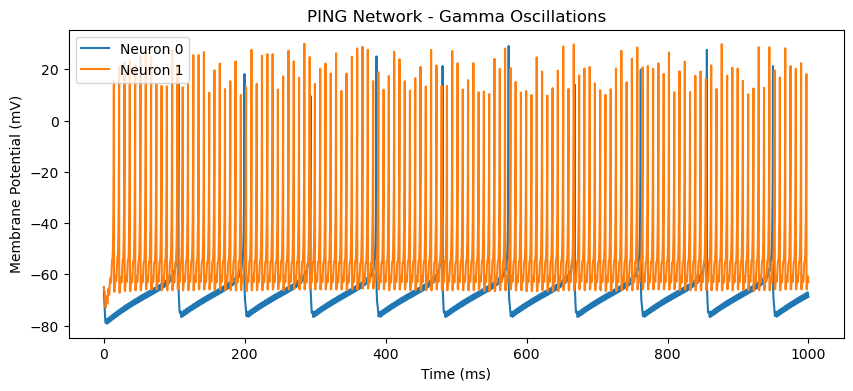

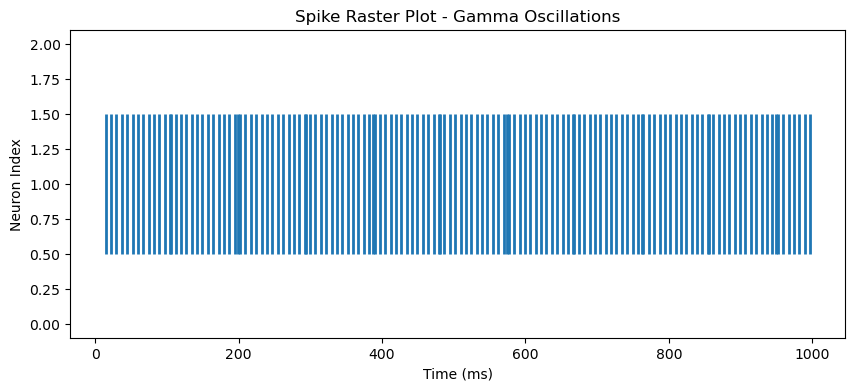

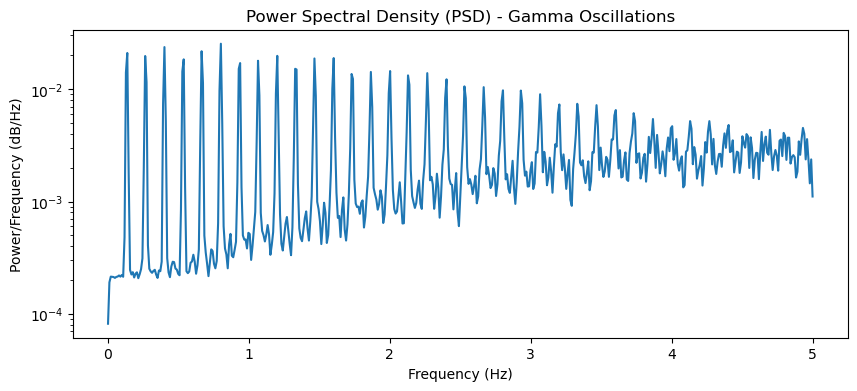

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Izhikevich neuron model parameters
# Modify these parameters to change the time constants
a = np.array([0.02, 0.1])  # Time constant parameter 'a' for pyramidal and inhibitory neurons
b = np.array([0.2, 0.2])   # Time constant parameter 'b' for pyramidal and inhibitory neurons
c = np.array([-65, -65])
d = np.array([8, 2])

# Synaptic parameters
weights = np.array([[0.5, -1], [1, -0.5]])
synaptic_delays = np.array([[1, 1], [1, 1]])
synaptic_strength = 0.01

# Simulation parameters
dt = 0.1
T = 1000
num_neurons = 2

# Neuron state variables
v = -65.0 * np.ones((num_neurons, int(T/dt)))
u = np.zeros_like(v)  # Initialize u to zeros

# Input parameters for gamma oscillations
I_mean = np.array([10.0, 0.0])
I_amplitude = np.array([5.0, 0.0])
freq = 40.0

# Time array
time = np.arange(0, T, dt)

# Simulation loop
spike_times = []

for t in range(int(T/dt)-1):
    # Input current with gamma oscillations
    I = I_mean + I_amplitude * np.sin(2 * np.pi * freq * t / 1000.0)

    # Update neuron state using the Izhikevich model equations
    dv = (0.04 * v[:, t]**2 + 5 * v[:, t] + 140 - u[:, t] + np.dot(weights, I)) * dt
    du = (a * (b * v[:, t] - u[:, t])) * dt

    v[:, t+1] = v[:, t] + dv
    u[:, t+1] = u[:, t] + du

    # Check for spikes and reset the membrane potential
    spikes = np.where(v[:, t+1] >= 30.0)[0]
    if len(spikes) > 0:
        spike_times.extend([t*dt] * len(spikes))
        v[spikes, t+1] = c[spikes]
        u[spikes, t+1] += d[spikes]

# Plot the membrane potential of all neurons
plt.figure(figsize=(10, 4))
for neuron_index in range(num_neurons):
    plt.plot(time, v[neuron_index], label=f'Neuron {neuron_index}')

plt.title('PING Network - Gamma Oscillations')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()

# Plot spike raster plot
plt.figure(figsize=(10, 4))
plt.eventplot(spike_times, linewidths=2)
plt.title('Spike Raster Plot - Gamma Oscillations')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.show()
